In [1]:
# lets load up the handwritten digit dataset
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

ds = load_digits()
X = ds.data/16.0-0.5
y = ds.target

print(X.shape)
print(y.shape)
print(np.min(X),np.max(X))
print(np.unique(y))

(1797, 64)
(1797,)
-0.5 0.5
[0 1 2 3 4 5 6 7 8 9]


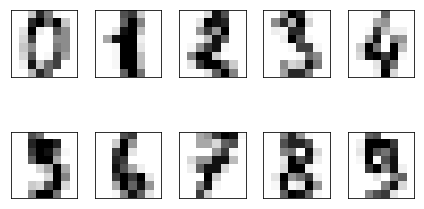

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

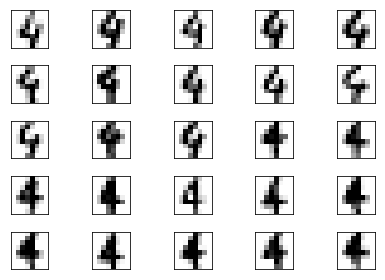

In [3]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
digit = 4
x_digits = X[y == digit]
for i in range(25):
    img = x_digits[i].reshape(8, 8)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


# Multi-layer Perceptron (MLP)

## Network as a black box

Given the network an **instance vector**, $x$, we would like to send it through our trained **network** and have the newtork output it's prediction for the **class** $x$ belongs to. This networks output prediction comes in the form of a **prediction vector**, $\tilde{y}$.

$$ 
x
\hspace{1cm}
\rightarrow
\mathbf{\text{NETWORK}}
\rightarrow  \hspace{1cm}
\tilde{y}
$$


The instance vector's elements are called **features**, and the network uses these features to determine the class that particular instance most likley belongs to.

Say our instances all have $n$ features $\left( \, \, f_0, \, f_1, \, \ldots, \, f_{n-1} \, \right)$, <br/> and we want to classify these instances into one of $p$ classes $\left( \, c_0, \, c_1, \, \ldots, \, c_{p-1} \, \right)$.  <br/>
Then we write the instance vectors and prediction vectors like this,

$$ 
x =
\begin{bmatrix} f_{0}, & \, \ldots, & \, f_{n-1} \end{bmatrix},
\hspace{1cm}
\begin{bmatrix}
       score_{c_{0}} \\
       \vdots \\
       score{c_{p-1}}
\end{bmatrix}
= \tilde{y}
$$

Sending the instance $x$ through our network results in the networks prediction vector $y$ with a score for each class in it's assosciated row.

$$ 
x =
\begin{bmatrix} f_0, & \, \ldots & \, f_{n-1} \end{bmatrix}  \hspace{1cm}
\rightarrow
\mathbf{\text{NETWORK}}
\rightarrow  \hspace{1cm}
\begin{bmatrix}
       score_{c_{0}} \\
       \vdots \\
       score_{c_{p-1}}
\end{bmatrix}
= \tilde{y}
$$

The row with largest value in $ \tilde{y} $ is usually taken to be the predicted class. 
So for the input vector, $x$, the predicted class would be the class corresponding to the row in the prediction vector, $y$, with the largest value. <br/>

Say the $j^{th}$ row is the largest value in $\tilde{y}$, then the class corresponding to row $j$ ($c_j$) is the networks perdiction for the instance $x$.

$$
\tilde{y} =
\begin{bmatrix}
       score_{c_{0}} \\
       \vdots \\
       \mathbf{score_{c_j}}\\
       \vdots \\
       score_{c_{p-1}}
\end{bmatrix}, \text{ where } score_{c_j} \text{ is the } max \left( score \right) \in  \tilde{y}
$$

Then the network predicted that the instance $x$ is a memeber of class $c_j$.

Take a look at what this might look like using some python code...

`import numpy as np`<br/><br/>

`# let's use a network that takes instances with 3 features`<br/>
`f0, f1, f2 = 1, 1, 2`<br/><br/>

`# and lets say the network has two classes`<br/>
`class_dictonary = {0:'class_0', 1:'class_1'}`<br/><br/>

`# create the instance vector x that we would like to classify...`<br/>
`x = np.array([f0,f1,f2])` <br/><br/>

`# pass the instance to our trained network for its prediction...`<br/>
`y_hat = network.predict(x)` <br/><br/>

`# printing y_hat we will see the scores our network gave for each class`<br/>
`print(y_hat)`<br/>
`  [0.9 0.2]`<br/><br/>

`# get the index of y_hat with the highest score`<br/>
`predicted_class_index = np.argmax( y_hat )`<br/><br/>

`# and use the class dictonary to make it human readable`<br/>
`prediction = class_dictonary[ predicted_class_index ]`<br/><br/>

`print( prediction )`<br/>
`  class_0`<br/><br/>

### Using Matrices
With lots of instances it becomes useful to group these vectors into Matrices

If there are $m$ instance vectors, $ \left( \, x_{0}, \, \ldots, \, x_{m-1} \, \right) $, each with $n$ features, <br/>

$$ 
x_i =
\begin{bmatrix} f_0, & \, \ldots, & \, f_{n-1} \end{bmatrix},
\hspace{0.5cm} for \; i = 0, \, \ldots, \, n-1
$$



Then we can group these instance vectors into rows in an input matrix, $ \mathbf{X}_{m \times n} $, and use this matrix as an input to the network, <br/> <br/>
$$
\mathbf{X} =
\begin{bmatrix}
    \text{---} & x_0 & \text{---} \\
               & \ldots    & \\
    \text{---} & x_{m-1} & \text{---}
\end{bmatrix}
$$



Similarly the output prediction vectors of the network for each instance represented as a matrix of column vectors, <br/>

$$
\mathbf{\tilde{Y}} = 
\begin{bmatrix}
    \vert         &        & \vert       \\
    \tilde{y}_0   & \ldots & \tilde{y}_{m-1} \\
    \vert         &        & \vert
\end{bmatrix}
$$

The number of **rows** in $\mathbf{\tilde{Y}}$ is equal to the number of **classes** the network is trying to classify and the output of the network would be $\mathbf{\tilde{Y}}_{m \times p}$. 

$$
\mathbf{\tilde{Y}} =
\begin{bmatrix}
    \text{---} & score_{c_0} & \text{---} \\
               & \ldots    & \\
    \text{---} & score_{c_{p-1}} & \text{---}
\end{bmatrix}
$$



The prediction for a single instance $x_i$ ( which is the $i^{th}$ row of $\mathbf{X}$ )
would be $ \tilde{y_i} $, which is the $i^{th}$ column in $\mathbf{\tilde{Y}}$. <br/>
<br/>

$$
\mathbf{X} =
\begin{bmatrix}
    \text{---} & x_0 & \text{---} \\
               & \ldots    & \\
    \mathbf{\text{---}} & \mathbf{x_i} & \mathbf{\text{---}} \\
               & \ldots    & \\
    \text{---} & x_{m-1} & \text{---}
\end{bmatrix} \hspace{1cm}
\rightarrow
\mathbf{\text{NETWORK}}
\rightarrow \hspace{1cm}
\begin{bmatrix} 
    \vert         &        &\mathbf{\text{|}}      &        & \vert       \\
    \tilde{y}_0   & \ldots &\mathbf{\tilde{y}_i}   & \ldots & \tilde{y}_{m-1} \\
    \vert         &        &\mathbf{\text{|}}      &        & \vert
\end{bmatrix}
= \mathbf{\tilde{Y}}
$$

<center> Now the Networks prediction for $\mathbf{X}[i,:]$ is its output $\mathbf{Y}[:,i]$</center>



Compare this to what we had above,

$$ 
x =
\begin{bmatrix} f_0, & \, \ldots & \, f_{n-1} \end{bmatrix}  \hspace{1cm}
\rightarrow
\mathbf{\text{NETWORK}}
\rightarrow  \hspace{1cm}
\begin{bmatrix}
       score_{c_{0}} \\
       \vdots \\
       score_{c_{p-1}}
\end{bmatrix}
= \tilde{y}
$$

## Feed Forward Network Aretecture
"What is happening when the network makes its predictions"

### Single Layer Perceptron
Lets start with the simple case of one layer...

With the single layer case, if we ignore bias terms and activation functions then we are just trying to solve the linear system bellow for $\mathbf{W}$,

$$
    \mathbf{W} \mathbf{X^{T}} = \mathbf{Y}
$$

Notice here that $\mathbf{Y}$ is missing it's hat ( $\mathbf{\tilde{Y}}$ )...

We want our network to predict the classes for each row in $\mathbf{X}$ correctly, so we "train" our network by solving this system for $\mathbf{W}$ using instances we know the true classes for. The true classes are denoted by dropping the hat on $\mathbf{Y}$. When we solve this system for $\mathbf{W}$ on our training data we hope that it will provide accurate predictions for examples we encounter in the real world.

To prepare for the multilayer case lets introduce another variable now...

Let $\mathbf{A} = \mathbf{X^{T}}$ and the system we are trying to solve is now,

$$
    \mathbf{W} \mathbf{A} = \mathbf{Y}
$$

In [208]:
#!/usr/bin/env

__filename__ = "latex_doc_strings.py"
__author__ = "L.J. Brown"

import re
from IPython.display import display, Math, Latex

def extract_doc_latex(method):
    """
        looks for latex in doc strings of passes method.
        
        Format example for docstring:
        
            r\""" 
                    Foo Method Description 

                :latex: MULTI-LINE
                        LATEX EXPRESSION
                        INSERTED HERE
                        
                :param bar: (example parameter)
                :returns: (whatever) 

                * [Notes] : 
                
                    - latex code must be followed by 
                        at least one ':'(like the one 
                        leading param above)
                        
                    - doc string must be proceeded by r\""" 
            \"""
            
        :param: method with string literal doc string containing latex
        :returns: latex string literal
        
    """
    p = re.compile('(?:\:latex\:)([\s\S]+?)(?:\:)', re.MULTILINE)
    m = p.search(method.__doc__)
    return m.group(1)

def latex_doc(method):
    """
    returns rendered latex from doc string of method passed as parameter

    Format example for docstring:

            r\""" 
                    Foo Method Description 

                :latex: MULTI-LINE
                        LATEX EXPRESSION
                        INSERTED HERE

                :param bar: (example parameter)
                :returns: (whatever) 

                * [Notes] : 

                    - latex code must be followed by 
                        at least one ':'(like the one 
                        leading param above)

                    - doc string must be proceeded by r\""" 
            \"""

    :param: method with string literal doc string containing latex
    :returns: formated latex expression

    """  

    latex_string = extract_doc_latex(method)
    return display(Math(latex_string))

# example method with latex in doc string formated correctly
def foo(bar):
    r"""
            Example method with latex in doc string

        :latex: \text{Pythagorean Theorem} \\
                a^2 + b^2 = c^2
        :param bar: example parameter
        :returns: None
    """

# render doc string latex for example method above
latex_doc(foo)

<IPython.core.display.Math object>

In [228]:
def add_bias(M, how='column'):
    r"""
        Add bias unit (column or row of 1s) to array at index 0
        
       :latex: 
       
               \text{Takes as input paramater a matrix $M_{m \times n}$.} \\
               \text{Adds a bias row or column of '$1's$' to the first row } \\
               \text{or column, depending on input parameter 'how'.} \\
               \text{('how' parameter defaults to 'column')}\\ \\ \\
               \mathbf{M_{input}} =
                \begin{bmatrix}
                    m_{0,0} & \ldots  & m_{0,n} \\
                    \vdots  & \ldots  & \vdots \\
                    m_{m,0} & \ldots  & m_{m,n}
                \end{bmatrix}
                \\\\
                \text{Returns, }\\
                \mathbf{M'_{column \, bias}} =
                \begin{bmatrix}
                     1     &  m_{0,0} & \ldots  & m_{0,n+1} \\
                   \vdots  &  \vdots  & \ldots  & \vdots \\
                     1     &  m_{m,0} & \ldots  & m_{m,n+1}
                \end{bmatrix}, 
                \begin{bmatrix}
                     1       & \ldots  & 1      \\
                     m_{0,0} & \ldots  & m_{0,n} \\
                     \vdots  & \ldots  & \vdots  \\
                     m_{m+1,0} & \ldots  & m_{m+1,n}
                \end{bmatrix} 
                = \mathbf{M'_{row \, bias}}
       :param M: numpy array to add bias row or column to
       :param how: 'column' or 'row', default 'coulmn'
    """
    if how == 'column':
        ones = np.ones((M.shape[0], 1))
        M_new = np.hstack((ones, M))
    elif how == 'row':
        ones = np.ones((1, M.shape[1]))
        M_new = np.vstack((ones, M))
    return A_new

latex_doc(add_bias)

<IPython.core.display.Math object>

In [ ]:
def initialize_weights(M):
    """Initialize weights with small random numbers."""
    W1_num_elems = (self.n_features_ + 1)*self.n_hidden
    W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
    W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W

Limitations and abilities of this system

Bias terms and phi functions

### Phi $ \Phi( \; Z \; ) $  Functions

#### Single instance input $ \phi( \; \vec{z} \; ) $ and matrix input $ \Phi( \; \mathbf{Z} \; ) $

$ \vec{a_{i+1}} = \phi ( \; \vec{z_{i}} \; ) $

$ \mathbf{A_{i+1}} = \Phi ( \; \mathbf{Z_{i}} \; ) $

#### Sigmoid

In [5]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30, C=0.0, epochs=500, eta=0.001, phi="sigmoid", objective_function="quadratic", random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.phi = phi
        self.objective_function = objective_function
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _linear(z):
        return z
    
    def _phi(self, z):
        if self.phi == "sigmoid":
            return self._sigmoid(z)
        if self.phi == "linear":
            return self._linear(z)
        
    def _phi_grad(self, a):
        if self.phi == "sigmoid":
            return a*(1-a)
        if self.phi == "linear":
            return a
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _objective_grad(self, y, y_hat):
        obj_grad = -2*(y - y_hat) * self._phi_grad(y_hat)
        return obj_grad
    
    @staticmethod
    def _MSE(Y_enc, Y_hat):
        cost = np.mean((Y_enc-Y_hat)**2)
        return cost
    
    @staticmethod
    def _log_likelihood(Y_enc, Y_hat):
        #term1 = -Y_enc * (np.log(Y_hat))
        #term2 = (1.0 - Y_enc) * np.log(1.0 - Y_hat)
        #cost = np.sum(term1 - term2)
        cost = np.sum(Y_enc * (np.log(Y_hat)))
        return cost
        
    def _cost(self,Y_hat,Y_enc,W1,W2):
        '''Get the objective function value'''
        if self.objective_function == "quadratic":
            cost = self._MSE(Y_enc, Y_hat)
        if self.objective_function == "cross_entropy":
            cost = self._log_likelihood(Y_enc, Y_hat)
        #cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term

In [6]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._phi(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._phi(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # backpropagation
        grad1 = np.zeros(W1.shape)
        grad2 = np.zeros(W2.shape)
        
        # for each instance's activations 
        for (a1,a2,a3,y) in zip(A1.T,A2.T,A3.T,Y_enc.T):
            
            dJ_dz2 = self._objective_grad(y, a3)
            dJ_dz1 = dJ_dz2 @ W2 @ np.diag(self._phi_grad(a2))
                         
            dz2_dw2 = a2[np.newaxis,:]
            dz1_dw1 = a1[np.newaxis,:]
            
            # grad = VA.T 
            grad2 += dJ_dz2[:,np.newaxis]  @ dz2_dw2
            grad1 += dJ_dz1[1:,np.newaxis] @ dz1_dw1
            # don't incorporate bias term in the z1 gradient 
            # (its added in a2 from another layer)
            

        # regularize weights that are not bias terms
        grad1[:, 1:] += (W1[:, 1:] * self.l2_C)
        grad2[:, 1:] += (W2[:, 1:] * self.l2_C)

        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3 = self._feedforward(X_data,self.W1,self.W2)
            
            cost = self._cost(A3,Y_enc,self.W1,self.W2)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2)

            self.W1 -= self.eta * grad1
            self.W2 -= self.eta * grad2
            

        return self

In [11]:
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              random_state=1,
              phi="sigmoid",
              objective_function="quadratic")

In [10]:
%%time 
nn = TwoLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=10)
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:85: RuntimeWarning: overflow encountered in square
/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in multiply
Epoch: 200/200

Test acc: 0.12222222222222222
CPU times: user 24.5 s, sys: 2.79 s, total: 27.3 s
Wall time: 6.84 s
